## Warm up

In [238]:
#importing necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [239]:
xls = pd.ExcelFile("../data/pwt100.xlsx")
all_df = pd.read_excel(xls, "Data")

# 1. Trend Calculation

In [240]:
from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend

In [241]:
# 2.2) Clean data

# Subset relevant columns and compute per capita real GDP
data = all_df.loc[:, ("country", "year", "rgdpna", "pop")] #use 2017 national prices
data["rgdpna_pc"] = data["rgdpna"] / data["pop"]

# select your country as a country
data = data.loc[data["country"] == "Brazil", ("year", "rgdpna", "rgdpna_pc")]
# Reset the index (not crucial)
data.index = data["year"]

Ypc = data["rgdpna_pc"]
ypc = np.log(Ypc)

Y = data["rgdpna"]
y = np.log(Y)

# Compute sample size.
T = len(Y) # sample size used for regression

Next, we will compute four different specifications: (i) additive + linear (ii) additive + quadratic
(iii) exponential + linear and (iv) exponential + quadratic. We will use
`get_regression_coefs(y, x1, x2)` in Python to run our linear regressions.

### a) Linear Additive Model 📈

### GDP trend:

In [242]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [243]:
# Initialise predicted values Yhat
Yhat_add_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

/var/folders/g4/8ft2rrv13nb5qxqxxmh622pc0000gn/T/ipykernel_62024/3092062490.py:9: RuntimeWarning: invalid value encountered in log
  yhat_add_lin = np.log(Yhat_add_lin)


Now we proceed to plot the graph for the linear + additive model.

Text(0.5, 1.0, 'Additive Linear: GDP & trend')

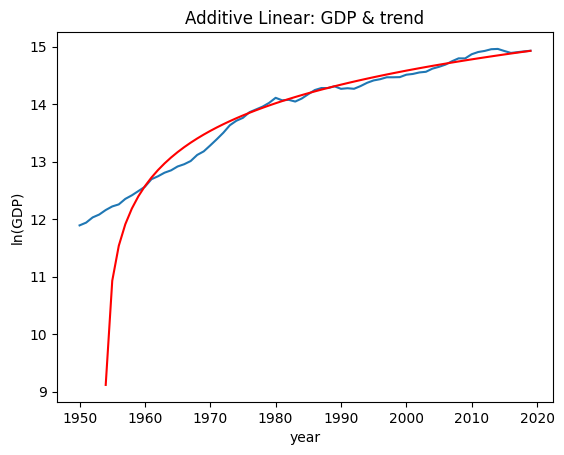

In [244]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_lin, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Linear: GDP & trend")


### GDP per capita trend:

Text(0.5, 1.0, 'Additive Linear: GDP per capita & trend')

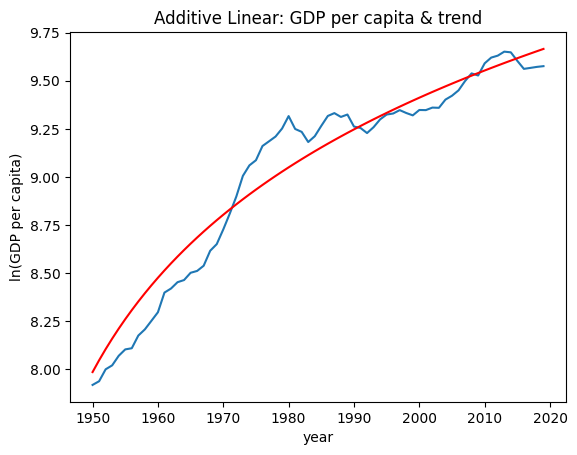

In [245]:
a_add_linpc, b_add_linpc = get_regression_coefs(Ypc, x1, x2)

# Initialise predicted values yhat
Yhat_add_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_linpc[t] = a_add_linpc + b_add_linpc * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_linpc = np.log(Yhat_add_linpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_linpc, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Linear: GDP per capita & trend")

### b) Linear Quadratic Model 📈

In [246]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_add_quad, b_add_quad, c_add_quad = get_regression_coefs(Y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [247]:
# Initialise predicted values Yhat
Yhat_add_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quad[t] = a_add_quad + b_add_quad * (t + 1) + c_add_quad * (t+1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quad = np.log(Yhat_add_quad)

Now we proceed to plot the graph for the linear + quadratic model.

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP) & trend')

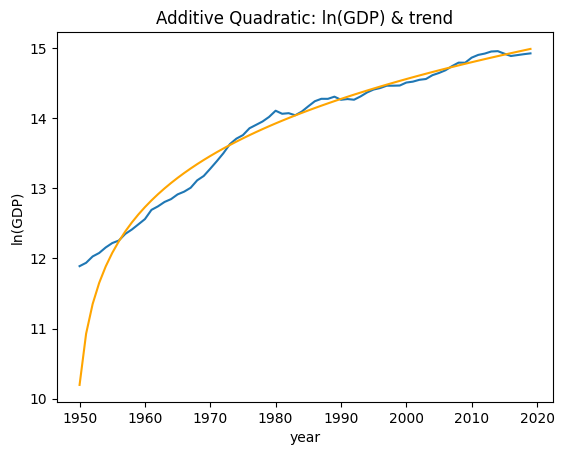

In [248]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_quad, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Quadratic: ln(GDP) & trend")

### GDP per capita trend:

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP per capita) & trend')

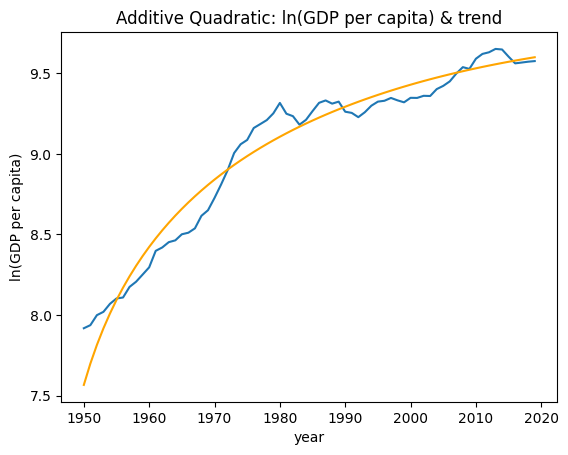

In [249]:
a_add_quadpc, b_add_quadpc, c_add_quadpc = get_regression_coefs(Ypc, x1, x2, x3)

# Initialise predicted values yhat
Yhat_add_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quadpc[t] = a_add_quadpc + b_add_quadpc * (t + 1) + c_add_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quadpc = np.log(Yhat_add_quadpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_quadpc, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Quadratic: ln(GDP per capita) & trend")


### c) Exponential Linear Model 📈

In [250]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_exp_lin, b_exp_lin = get_regression_coefs(y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [251]:
# Initialise predicted values Yhat
yhat_exp_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1) # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + linear model.

Text(0.5, 1.0, 'Exponential Linear: GDP & trend')

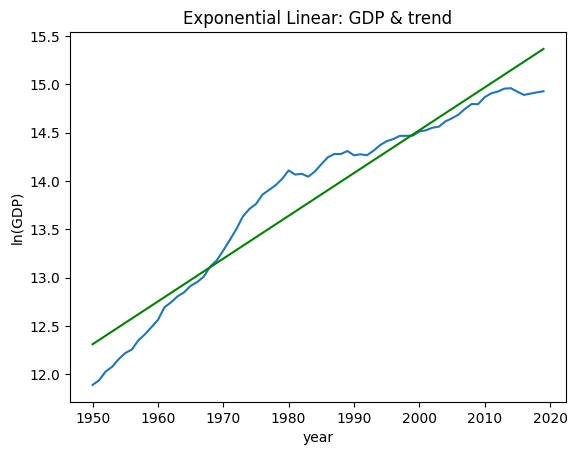

In [252]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_lin, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Linear: GDP & trend")


Text(0.5, 1.0, 'Exponential Linear: GDP per capita & trend')

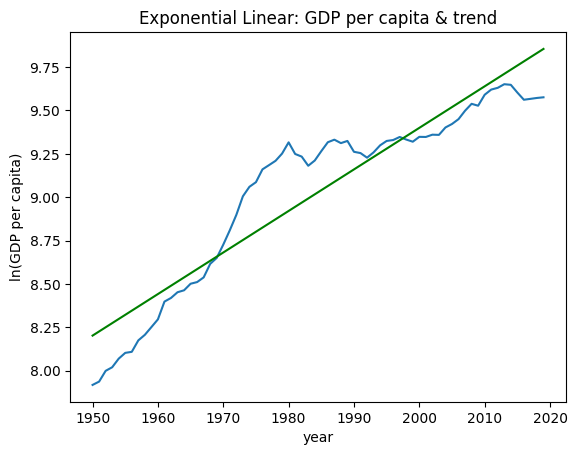

In [253]:
a_exp_linpc, b_exp_linpc = get_regression_coefs(ypc, x1, x2)

# Initialise predicted values yhat
yhat_exp_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_linpc[t] = a_exp_linpc + b_exp_linpc * (t + 1) # recall that Python indexing starts at 0

# No need to convert to log units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_linpc, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Linear: GDP per capita & trend")

### d) Exponential Quadratic Model 📈

In [254]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [255]:
# Initialise predicted values yhat
yhat_exp_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad[t] = a_exp_quad + b_exp_quad * (t + 1) + c_exp_quad * (t+1)**2 # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + quadratic model.

Text(0.5, 1.0, 'Exponential Quadratic: GDP & trend')

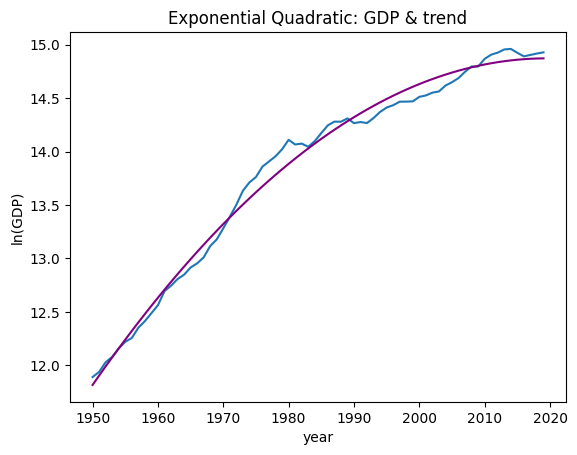

In [256]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_quad, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Quadratic: GDP & trend")


Text(0.5, 1.0, 'Exponential Quadratic: ln(GDP per capita) & trend')

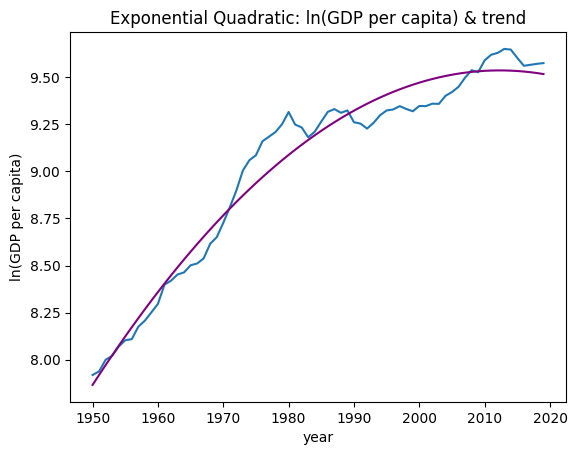

In [257]:
a_exp_quadpc, b_exp_quadpc, c_exp_quadpc = get_regression_coefs(ypc, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quadpc[t] = a_exp_quadpc + b_exp_quadpc * (t + 1) + c_exp_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# No need to convert into log-units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_quadpc, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Quadratic: ln(GDP per capita) & trend")

# 2. Extracting TFP

We use the production function $Y = AK^\alpha(HL)^{1-\alpha}$
* A is TFP
* K is capital stock
* H is human capital index
* L is annual hours worked in the economy.
* L = average annual hours worked by an employed worker x number of employed workers
* We set the standard value of alpha = 0.3

Therefore,
 $$TFP = A=Y/{K^{\alpha}(HL)^{1-\alpha}}$$

In [258]:
alpha = 0.3

#Get relevant variables for Brazil
data_tfp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna", "rnna", "hc", "emp", "avh", "rtfpna")]
data_tfp["labour"] = data_tfp["emp"]*data_tfp["avh"]

data.index = data['year']

#Extract TFP
data_tfp["tfp"] = data_tfp["rgdpna"] / (data_tfp["rnna"]**alpha*(data_tfp["hc"]*data_tfp["labour"])**(1-alpha))
    

Text(0.5, 1.0, 'TFP series')

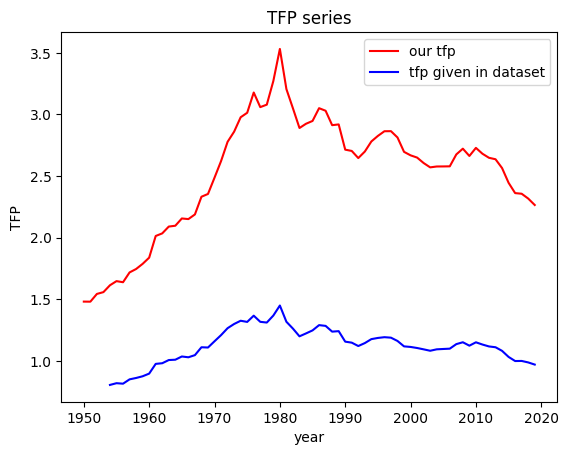

In [259]:
plt.figure()
plt.plot(data_tfp["year"], data_tfp["tfp"], color = "red", label = "our tfp")
plt.plot(data_tfp["year"], data_tfp["rtfpna"], color = "blue", label = "tfp given in dataset") #plotting the tfp values given in dataset for reference

plt.legend(loc="upper right", fontsize=10)

plt.xlabel("year")
plt.ylabel("TFP")

plt.title("TFP series")

# 3. Growth Accounting

$$g_Y = g_A + \alpha g_K + (1-\alpha)g_H + (1-\alpha)g_L$$

Growth accounting equations:

$$
\begin{aligned}
\text{contr\_A} = \frac{g_A}{g_Y} \\
\text{contr\_K} = \alpha \cdot \frac{g_K}{g_Y} \\
\text{contr\_H} = (1-\alpha) \cdot \frac{g_H}{g_Y} \\
\text {contr\_L} = (1-\alpha) \cdot \frac{g_L}{g_Y}
\end{aligned}
$$

In [260]:
#def function to calculate growth rates
def compute_growth_rate(X):
    #np.log is the natural logarithm by default in numpy
    #use of index slicing, e.g. X[1:] are all values starting from the second element, X[:-1] all elements up until (but not including) the last element
    Y = X.to_numpy() #so operations are purely element wise
    return np.log(Y[1:] / Y[:-1])

gY = compute_growth_rate(data_tfp["rgdpna"])
gA = compute_growth_rate(data_tfp["tfp"])
gK = compute_growth_rate(data_tfp["rnna"])
gH = compute_growth_rate(data_tfp["hc"])
gL = compute_growth_rate(data_tfp["labour"])

Text(0.5, 1.0, 'Growth Accounting')

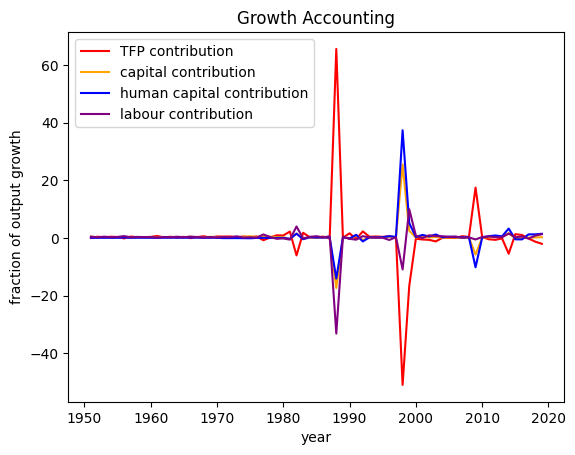

In [261]:
contr_A = gA / gY
contr_K = alpha * gK / gY
contr_H = (1-alpha) * gH / gY
contr_L = (1- alpha) * gL / gY

plt.figure()
plt.plot(data_tfp["year"][1:], contr_A, color = "red", label = "TFP contribution")
plt.plot(data_tfp["year"][1:],contr_K, color = "orange", label = "capital contribution")
plt.plot(data_tfp["year"][1:], contr_H, color = "blue", label = "human capital contribution")
plt.plot(data_tfp["year"][1:], contr_L, color = "purple", label = "labour contribution")

plt.legend(loc="best", fontsize=10)

plt.xlabel("year")
plt.ylabel("fraction of output growth")

plt.title("Growth Accounting")

In [262]:
# Compute yearly intervals of the form "2000-2001"
intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(data_tfp["year"][:-1], data_tfp["year"][1:])])

# Fill in the dataframe
df_contr = pd.DataFrame(
    data = np.hstack((intvls[:, None], contr_K[:, None], contr_L[:, None], contr_H[:, None], contr_A[:, None], gY[:, None])),
    columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y growth rate']
)

# Specify the data types for specific columns (it would be more efficient to define dataypes already before creating dataframe)
df_contr = df_contr.astype({
    'year': 'object',
    'K contribution': 'float64',
    'L contribution': 'float64',
    'H contribution': 'float64',
    'A contribution': 'float64',
    'Y growth rate' : 'float64'})

# Set index
df_contr = df_contr.set_index('year')

# Set display options
pd.set_option('display.float_format', '{:.4f}'.format)

1950-1959:

In [263]:
print(df_contr.iloc[0:10,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1951          0.4545          0.4671          0.0859         -0.0074   
1951-1952          0.2506          0.2474          0.0452          0.4568   
1952-1953          0.2692          0.4563          0.0828          0.1918   
1953-1954          0.2138          0.2887          0.0521          0.4454   
1954-1955          0.2397          0.3663          0.0656          0.3283   
1955-1956          0.3422          0.6468          0.1635         -0.1525   
1956-1957          0.2008          0.2427          0.0609          0.4956   
1957-1958          0.2688          0.3778          0.0943          0.2591   
1958-1959          0.2861          0.3168          0.0785          0.3186   
1959-1960          0.2337          0.3170          0.0780          0.3713   

           Y growth rate  
year                      
1950-1951         0.0

1960-1970:

In [264]:
print(df_contr.iloc[10:20,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1960-1961          0.1390          0.1273          0.0398          0.6939   
1961-1962          0.3513          0.3382          0.1039          0.2065   
1962-1963          0.2096          0.2779          0.0839          0.4286   
1963-1964          0.3580          0.4332          0.1285          0.0803   
1964-1965          0.2437          0.2669          0.0778          0.4116   
1965-1966          0.4350          0.4708          0.1552         -0.0610   
1966-1967          0.2452          0.3341          0.1082          0.3125   
1967-1968          0.1664          0.1786          0.0568          0.5982   
1968-1969          0.4377          0.3102          0.0971          0.1550   
1969-1970          0.2257          0.1893          0.0582          0.5268   

           Y growth rate  
year                      
1960-1961         0.1

19670-1980:

In [265]:
print(df_contr.iloc[20:30,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1970-1971          0.2361          0.3211         -0.0476          0.4904   
1971-1972          0.2449          0.2867         -0.0453          0.5137   
1972-1973          0.2399          0.5756         -0.0391          0.2236   
1973-1974          0.4068          0.1474         -0.0652          0.5111   
1974-1975          0.6126          0.2474         -0.1014          0.2414   
1975-1976          0.2973          0.1373          0.0220          0.5434   
1976-1977          0.5079          1.2370          0.0447         -0.7895   
1977-1978          0.4730          0.3474          0.0443          0.1353   
1978-1979          0.3264         -0.2816          0.0329          0.9224   
1979-1980          0.2638         -0.1564          0.0244          0.8682   

           Y growth rate  
year                      
1970-1971         0.1

1980-1990:

In [266]:
print(df_contr.iloc[30:40,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1980-1981         -0.3725         -0.5717         -0.2847          2.2289   
1981-1982          1.5511          3.9968          1.4960         -6.0439   
1982-1983         -0.2578         -0.1344         -0.4158          1.8080   
1983-1984          0.1426          0.3968          0.2351          0.2256   
1984-1985          0.1220          0.6116          0.1636          0.1028   
1985-1986          0.1914          0.2132          0.1171          0.4783   
1986-1987          0.3594          0.5949          0.2439         -0.1981   
1987-1988        -17.3367        -33.1703        -14.0965         65.6034   
1988-1989          0.3234          0.3371          0.2719          0.0675   
1989-1990         -0.1719         -0.2957         -0.1676          1.6353   

           Y growth rate  
year                      
1980-1981        -0.0

1990-2000:

In [267]:
print(df_contr.iloc[40:50,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1990-1991          0.8617         -0.5871          1.1027         -0.3773   
1991-1992         -0.7309          0.6355         -1.2011          2.2965   
1992-1993          0.1627          0.1794          0.2392          0.4187   
1993-1994          0.1755          0.1008          0.1987          0.5250   
1994-1995          0.2531          0.0844          0.2731          0.3894   
1995-1996          0.4430         -0.6902          0.6209          0.6263   
1996-1997          0.3074          0.2885          0.3980          0.0061   
1997-1998         25.5220        -10.9106         37.3774        -50.9888   
1998-1999          2.5078          9.9789          5.2067        -16.6934   
1999-2000          0.1623          0.7743          0.3134         -0.2499   

           Y growth rate  
year                      
1990-1991         0.0

2000-2010:

In [268]:
print(df_contr.iloc[50:60,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
2000-2001          0.4913         -0.0249          1.0583         -0.5246   
2001-2002          0.1885          0.9282          0.5263         -0.6429   
2002-2003          0.3369          0.6438          1.2110         -1.1916   
2003-2004          0.0905          0.6069          0.2521          0.0506   
2004-2005          0.1554          0.4005          0.4380          0.0061   
2005-2006          0.1446          0.5174          0.3296          0.0084   
2006-2007          0.1221          0.0367          0.2173          0.6238   
2007-2008          0.1765          0.2176          0.2578          0.3482   
2008-2009         -5.7844         -0.5119        -10.1731         17.4693   
2009-2010          0.1413          0.3469          0.1765          0.3353   

           Y growth rate  
year                      
2000-2001         0.0

2010-2019:

In [269]:
print(df_contr.iloc[60:69,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
2010-2011          0.2750          0.5513          0.6246         -0.4509   
2011-2012          0.5152          0.2683          0.8656         -0.6491   
2012-2013          0.3462          0.2476          0.5564         -0.1502   
2013-2014          1.6527          1.5392          3.2769         -5.4689   
2014-2015         -0.1277          0.2600         -0.4563          1.3240   
2015-2016         -0.0669          0.5183         -0.4946          1.0431   
2016-2017          0.1459         -0.2316          1.2534         -0.1677   
2017-2018          0.1973          0.8206          1.2588         -1.2766   
2018-2019          0.2571          1.3055          1.4575         -2.0201   

           Y growth rate  
year                      
2010-2011         0.0390  
2011-2012         0.0190  
2012-2013         0.0296  
2013-2014        

In [270]:
# create dataframe of log values
ln_data_tfp= data_tfp.drop(columns='year').apply(np.log)
ln_data_tfp['year'] = data_tfp['year']

In [276]:
# Compute yearly intervals of the form "2000-2010"
dec_intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(data_tfp[data_tfp["year"] % 10 == 0]["year"][:-1], data_tfp[data_tfp["year"] % 10==0]["year"][1:])])

# dec_change is the difference in logs of the variables within each decade
# First row is NaN, second row is the difference between 1950 and 1960, so we delete first row
dec_change = ln_data_tfp[ln_data_tfp["year"] % 10 == 0][["rgdpna", "tfp", "rnna", "hc", "labour"]].diff().iloc[1:,:]

# Multiply log changes of each variable by different scalars according to the production function to obtain their growth contributions
mul_dict={"tfp":1, "rnna":alpha, "hc":(1-alpha), "labour":(1-alpha)}


# dec_contr is the growth contribution of each variable in each decade
# rearrange the columns the way we want them
dec_contr = dec_change.drop(columns = "rgdpna").mul(mul_dict).divide(dec_change["rgdpna"], axis=0).reindex(columns = ["rnna", "labour", "hc", "tfp"])

In [277]:

# Put together the dataframe
df_dec_contr = pd.DataFrame(data = np.hstack((dec_intvls[:, None], 
                                           dec_contr.to_numpy(), 
                                           dec_change["rgdpna"].to_numpy()[:, None])),
                            columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y growth rate'])

# Set index
df_dec_contr = df_dec_contr.set_index('year')

# Specify data type as float64
df_dec_contr = df_dec_contr.astype("float64")

print(df_dec_contr)

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1960          0.2626          0.3423          0.0740          0.3211   
1960-1970          0.2488          0.2525          0.0784          0.4203   
1970-1980          0.3240          0.2702         -0.0179          0.4237   
1980-1990          0.6900          1.3350          0.6602         -1.6851   
1990-2000          0.3486          0.2225          0.4985         -0.0696   
2000-2010          0.1804          0.3826          0.3740          0.0630   

           Y growth rate  
year                      
1950-1960         0.6719  
1960-1970         0.7194  
1970-1980         0.8277  
1980-1990         0.1562  
1990-2000         0.2458  
2000-2010         0.3558  


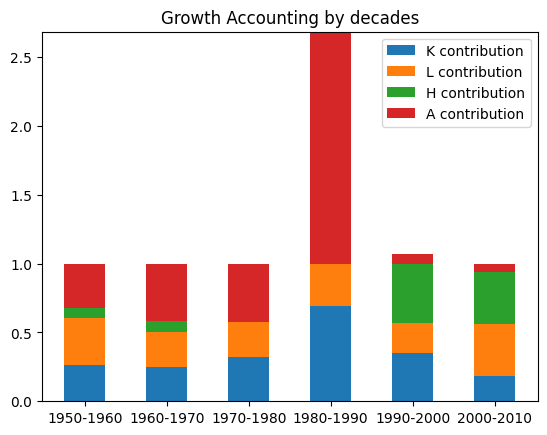

In [273]:
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(6)

for factor, contr in df_dec_contr.drop(columns = "Y growth rate").to_dict("list").items():
    p = ax.bar(df_dec_contr.index, contr, width, label=factor, bottom=bottom)
    bottom += np.array(contr)

ax.set_title("Growth Accounting by decades")
ax.legend(loc="upper right")

plt.show()

# 4. Labour Productivity

In [274]:
#subset of brazil's year, real gdp, and population data
data_lp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna","emp")]
data_lp["lp"] = data_lp["rgdpna"] / data_lp["emp"]
# Reset the index (not crucial)
data_lp = data_lp.reset_index(drop = True)

Text(0.5, 1.0, 'Labour Productivity Series')

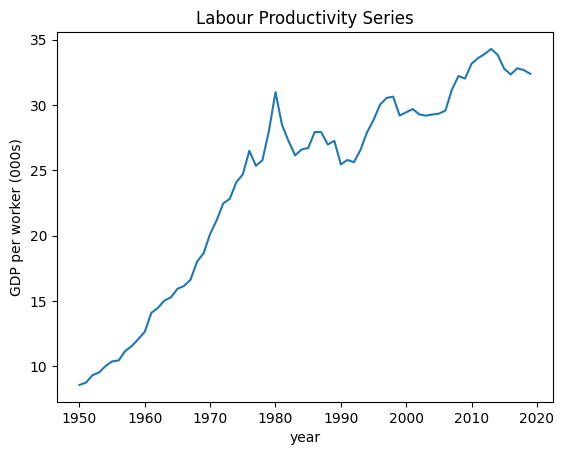

In [275]:
plt.figure()
plt.plot(data_lp['year'],data_lp['lp']/1000) #show gdp per worker in thousands

#labels
plt.xlabel("year")
plt.ylabel("GDP per worker (000s)")

#title
plt.title("Labour Productivity Series")